# **1. MODEL REGRESI**


## **1.1 Import Libraries and Load Data**

In [ ]:
#Import libraries

#Import warnings untuk mengabaikan perintah warning
import warnings
warnings.filterwarnings('ignore')

#Import numpy berkaitan dengan array
import numpy as np

# Import pandas berkaitan dengan dataframe
import pandas as pd

# Import seaborn dan matplotlib berkaitan dengan visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import sklearn LinearRegression, StandardScaler, train_test_split, dan metrics untuk membantu proses regresi.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#Create a dataframe
dataset = pd.read_csv("train.csv")

In [ ]:
#Show 5 top rows of dataset
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* Pada analisis ini, dataset yang digunakan merupakan data House Prices. Dataset tersebut di upload pada google colab dan dibaca menggunakan library pandas sebagi berikut `pd.read_csv('nama file')`. Untuk menampilkan 5 baris teratas data, digunakan atribut `.head()`
* Tujuan dari analisis ini adalah untuk memprediksi harga jual dari rumah berdasarkan feature yang mempengaruhinya.
* Data yang digunakan merupakan data train yang kemudian nantinya akan displit menjadi data train dan data test

## **1.2 Data Description**

In [ ]:
print("Shape dari dataset yaitu", dataset.shape)

Shape dari dataset yaitu (1460, 81)


Melalui atribut `.shape` kita dapat mengetahui bahwa pada `dataset.csv` terdapat 1460 baris dan 81 kolom.

In [ ]:
#Check the information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

* Dataset ini memiliki variabel-variabel yang hampir mendeskripsikan setiap aspek rumah residental. Di antara variabel-variabel tersebut, terdapat 38 variabel numerical seperti `Id`, `MSSubClass`, `LotFrontage`, dan 43 variabel kategorikal, seperti `MSZoning`, `Street`, `LotShape`, dll.
* Dengan total baris sebanyak 1460, terdapat 19 feature (dari 81 feature) yang memiliki nilai null, hal ini dapat dilihat dari Non-Null Count.
* Selanjutnya, lihat apakah tipe data sudah sesuai. Dalam hal ini, seluruh tipe data sudah sesuai sehingga tidak perlu ada yang diubah lagi.

## **1.3 Null and Missing Values Checking**

In [ ]:
#Missing Values pada dataset
data_missing_value = dataset.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(dataset))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,PoolQC,1453,99.52
1,MiscFeature,1406,96.30
2,Alley,1369,93.77
3,Fence,1179,80.75
4,FireplaceQu,690,47.26
5,LotFrontage,259,17.74
6,GarageYrBlt,81,5.55
7,GarageCond,81,5.55
8,GarageType,81,5.55
9,GarageFinish,81,5.55


Gunakan `.isnull` untuk melihat jumlah missing values pada masing-masing kolom dataset. Dari sini, terlihat top 5 kolom yang memiliki missing values terbanyak adalah `PoolQC`, `MiscFeature`, `Alley`, `Fence`, dan `FireplaceQu`.

In [ ]:
#Missing Values pada dataset
col_missing_value= data_missing_value['feature'].tolist()
dataset[col_missing_value].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        7 non-null      object 
 1   MiscFeature   54 non-null     object 
 2   Alley         91 non-null     object 
 3   Fence         281 non-null    object 
 4   FireplaceQu   770 non-null    object 
 5   LotFrontage   1201 non-null   float64
 6   GarageYrBlt   1379 non-null   float64
 7   GarageCond    1379 non-null   object 
 8   GarageType    1379 non-null   object 
 9   GarageFinish  1379 non-null   object 
 10  GarageQual    1379 non-null   object 
 11  BsmtFinType2  1422 non-null   object 
 12  BsmtExposure  1422 non-null   object 
 13  BsmtQual      1423 non-null   object 
 14  BsmtCond      1423 non-null   object 
 15  BsmtFinType1  1423 non-null   object 
 16  MasVnrArea    1452 non-null   float64
 17  MasVnrType    1452 non-null   object 
 18  Electrical    1459 non-null 

Untuk melihat secara lebih rinci, pada dataset terdapat 16 kolom variabel kategorikal yang memiliki missing values dan 3 kolom variabel numerik yang memiliki missing values.

Selanjutnya dibuat barplot untuk melihat distribusi data yang memiliki missing values.

[Text(0, 0, 'PoolQC'),
 Text(1, 0, 'MiscFeature'),
 Text(2, 0, 'Alley'),
 Text(3, 0, 'Fence'),
 Text(4, 0, 'FireplaceQu'),
 Text(5, 0, 'LotFrontage'),
 Text(6, 0, 'GarageYrBlt'),
 Text(7, 0, 'GarageCond'),
 Text(8, 0, 'GarageType'),
 Text(9, 0, 'GarageFinish'),
 Text(10, 0, 'GarageQual'),
 Text(11, 0, 'BsmtFinType2'),
 Text(12, 0, 'BsmtExposure'),
 Text(13, 0, 'BsmtQual'),
 Text(14, 0, 'BsmtCond'),
 Text(15, 0, 'BsmtFinType1'),
 Text(16, 0, 'MasVnrArea'),
 Text(17, 0, 'MasVnrType'),
 Text(18, 0, 'Electrical')]

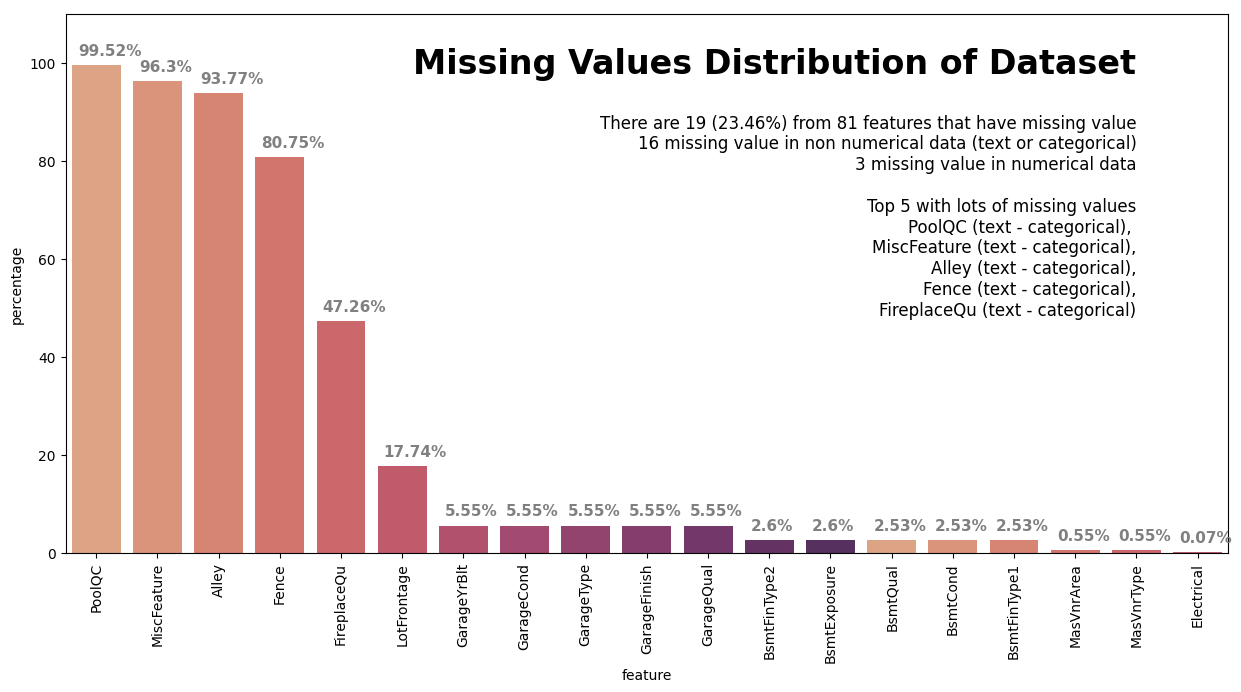

In [ ]:
# Visualisasi missing value pada dataset

fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'feature',y='percentage',data=data_missing_value,ax=ax,
               palette=sns.color_palette("flare", n_colors=13, desat=1))

x = np.arange(len(data_missing_value['feature']))
y = data_missing_value['percentage']

for i, v in enumerate(y):
    ax.text(x[i]-0.3, v+2, str(v)+'%', fontsize = 11, color='gray', fontweight='bold')

title = '''
Missing Values Distribution of Dataset
'''
ax.text(17,90,title,horizontalalignment='right',color='black',fontsize=24,fontweight='bold')


text = '''
There are 19 (23.46%) from 81 features that have missing value
16 missing value in non numerical data (text or categorical)
3 missing value in numerical data

Top 5 with lots of missing values
PoolQC (text - categorical),
MiscFeature (text - categorical),
Alley (text - categorical),
Fence (text - categorical),
FireplaceQu (text - categorical)

'''
ax.text(17,40,text,horizontalalignment='right',color='black',fontsize=12,fontweight='normal')

ax.set_ylim(0,110)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [ ]:
#Delete column Id pada dataset
dataset=dataset.drop("Id", axis=1)
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Karena pada analisis ini ID tidak diperlukan, maka bisa kita hapus dengan menggunakan atribut `.drop` lalu axis 1 karena kita ingin menghapus kolomnya.

## **1.4 Missing Values Handling**

In [ ]:
#Missing Value Handling Training Data
#To handling the missing values, we can fill it with the mean or median.
#If the distribution is normal, we can use mean or median but if its not we can use median.
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_missing = dataset[col_missing_value].select_dtypes(include=numerics)
num_missing.describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


Melalui .describe() kita dapat mengetahui bahwa:
* Pada LotFrontage meannya sebesar 70.049958 sementara mediannya sebesar 69.000000. Artinya, tidak terdapat perbedaan yang cukup besar.
* Pada GarageYrBlt meannya sebesar 1978.506164 sementara mediannya sebesar 1980.000000. Artinya, tidak terdapat perbedaan yang cukup besar.
* Pada MasVnrArea meannya sebesar 103.685262 sementara mediannya sebesar 0.000000. Artinya, terdapat perbedaan yang cukup besar.

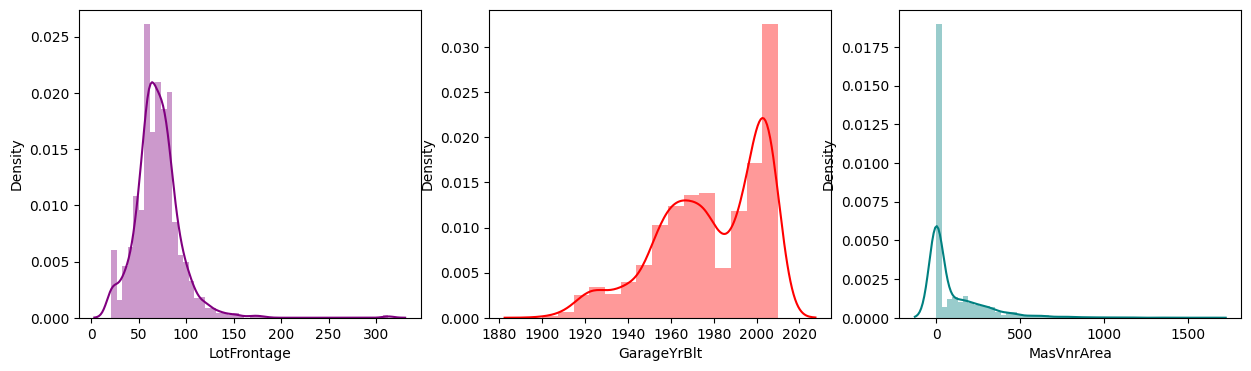

In [ ]:
#Missing Value Handling Training Data
#Check the normality
f, axes = plt.subplots(1,3, figsize = (15,4))
sns.distplot(num_missing["LotFrontage"], ax=axes[0], color='purple')
sns.distplot(num_missing["GarageYrBlt"], ax=axes[1], color='red')
sns.distplot(num_missing["MasVnrArea"], ax=axes[2], color='teal')
plt.show()

Karena berdasarkan distribution plot ada yang berdistribusi normal, bimodal dan ada pula yang secara ekstrem miring ke kanan, maka untuk mempermudah kita isi menggunakan median.

In [ ]:
#Missing Value Handling in Dataset
#Numerical
dataset["LotFrontage"] = dataset["LotFrontage"].fillna(value=dataset["LotFrontage"].median())
dataset["GarageYrBlt"] = dataset["GarageYrBlt"].fillna(value=dataset["GarageYrBlt"].median())
dataset["MasVnrArea"] = dataset["MasVnrArea"].fillna(value=dataset["MasVnrArea"].median())

#For the data that has more than 80% missing values, we can drop the column. But, before we drop it, we have to make sure that
#the variable is not affects the analysis.
dataset = dataset.drop(dataset.columns[[5, 71, 72, 73]], axis=1)

#For categorical data, we can't fill the missing values with mean or median, so if it has too many missing values we can fill
#it with "Others" and if it just a few missing values we can fill it with the "mode" (the most dominant value)
#Mode
dataset['MasVnrType'] = dataset['MasVnrType'].fillna(dataset['MasVnrType'].mode()[0])
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])
#Other
cat_missing= [i for i in dataset.columns if dataset[i].dtype == 'object' and i != 'MasVnrArea' and i != 'MasVnrType' and i != 'Electrical']
dataset.fillna(value='Others', inplace=True)

#Check the missing values more detail
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

*   Untuk mempermudah, isi missing values pada variabel numerikal dengan median.
* Untuk variabel yang memiliki missing values lebih dari 80% yaitu PoolQC, MiscFeature, Alley, dan Fence kita drop kolomnya.
* Untuk variabel kategorikal yang tidak terlalu banyak missing valuesnya seperti MasVnrArea, MasVnrType, dan Electrical kita isi dengan mode.
* Sisanya kita isi dengan "Others"
*   Setelah diisi, sekarang seluruh kolom memiliki 0 missing value.



Setelah diisi, sekarang seluruh kolom memiliki 0 missing value.

## **1.5 Categorical dan Numerical Variable Dalam Dataset**

In [ ]:
#Categorical Variable
data_cat = [i for i in dataset.columns if dataset[i].dtype == 'object']

#Numerical Variable
data_num = [i for i in dataset.columns if dataset[i].dtype != 'object']

Membagi antara kolom-kolom yang berupa kategorik dan numerik. Penyimpanan kolom ini memudahkan untuk proses kedepannya dimana kita fokus pada kolom-kolom yang akan dilakukan analisis.

In [ ]:
#Looping for value count
for col in data_cat:
    print(f'''Value count kolom {col}:''')
    print(dataset[col].value_counts())
    print()

Value count kolom MSZoning:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Value count kolom Street:
Pave    1454
Grvl       6
Name: Street, dtype: int64

Value count kolom LotShape:
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Value count kolom LandContour:
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Value count kolom Utilities:
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Value count kolom LotConfig:
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Value count kolom LandSlope:
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Value count kolom Neighborhood:
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41


Memastikan unique value sesuai dengan yang ada pada deskripsi data. Kali ini, semua unique value sudah sesuai.

## **1.6 EDA Training Data**

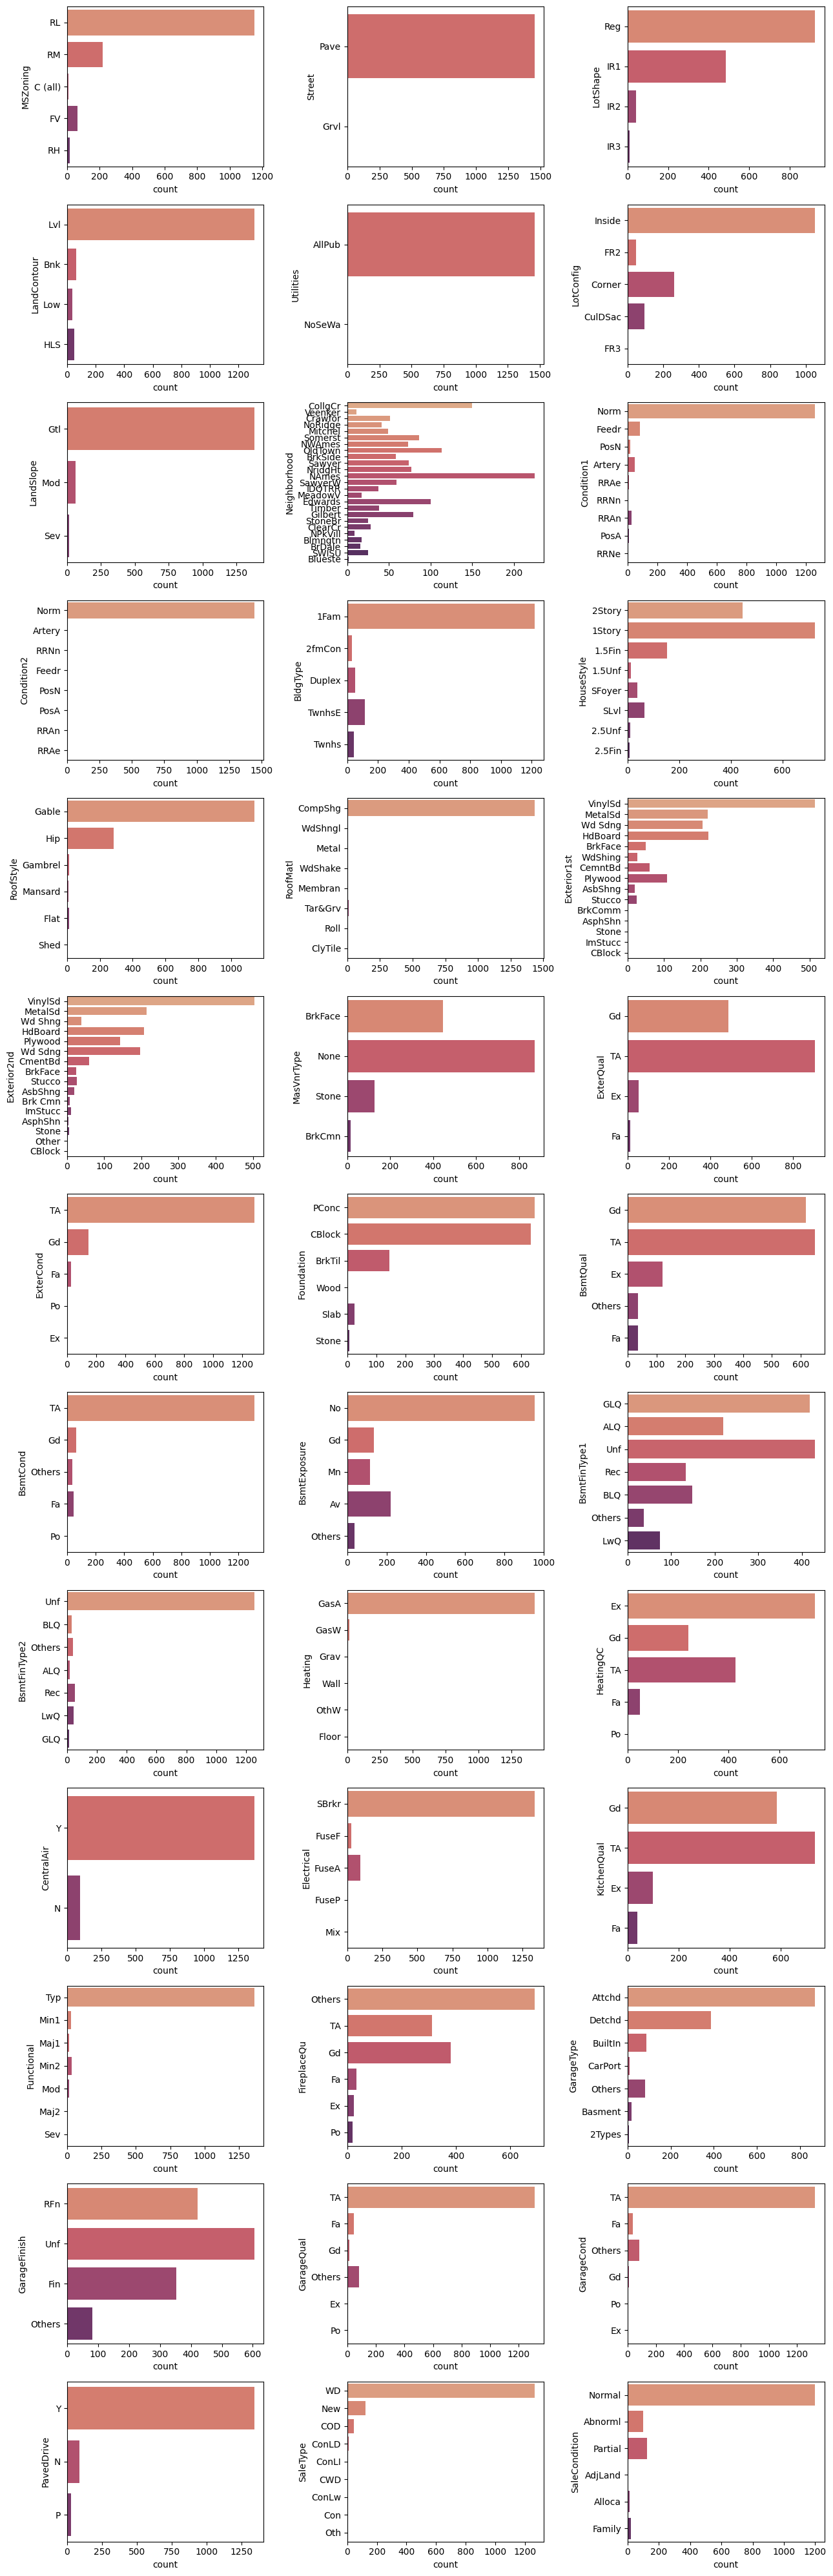

In [ ]:
#Count Plot Univariate Analysis (Categorical)
plt.figure(figsize=(13, 40))
for i in range(0, len(data_cat)):
    plt.subplot(13, 3, i+1)
    sns.countplot(y = dataset[data_cat[i]], orient='v', palette= 'flare')
    plt.tight_layout()

Melalui count plot, dapat dilihat jumlah masing-masing unique values. Di beberapa kategori, terdapat ketimpangan antarvalues, seperti pada Street, Utilities, Condition2, RoofMatl, dan lain sebagainya.

In [ ]:
#Pendekatan numerik
dataset[data_num].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


* Untuk mengindikasikan outlier, dapat dilihat dari selisih antara nilai median dan maksimum, apabila terdapat perbedaan yang cukup besar, kemungkinan terdapat outlier. Karena ketiga kolom memiliki perbedaan yang cukup besar, mungkin saja memiliki outlier.
* Melalui nilai mean dan median, dapat dideteksi skewed distributionnya.
* Pada MSSubClass, LotFrontage, LotArea, OverallQual, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, HalfBath, KitchenAbvGr, TotRmsAbvGrd, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, dan SalePrice, mean > median maka memiliki positively skewed distribution.
* Pada YearBuilt, YearRemodAdd, FullBath, BedroomAbvGr, Fireplaces, GarageYrBlt, GarageCars, dan GarageArea, mean < median maka memiliki negatively skewed distribution.

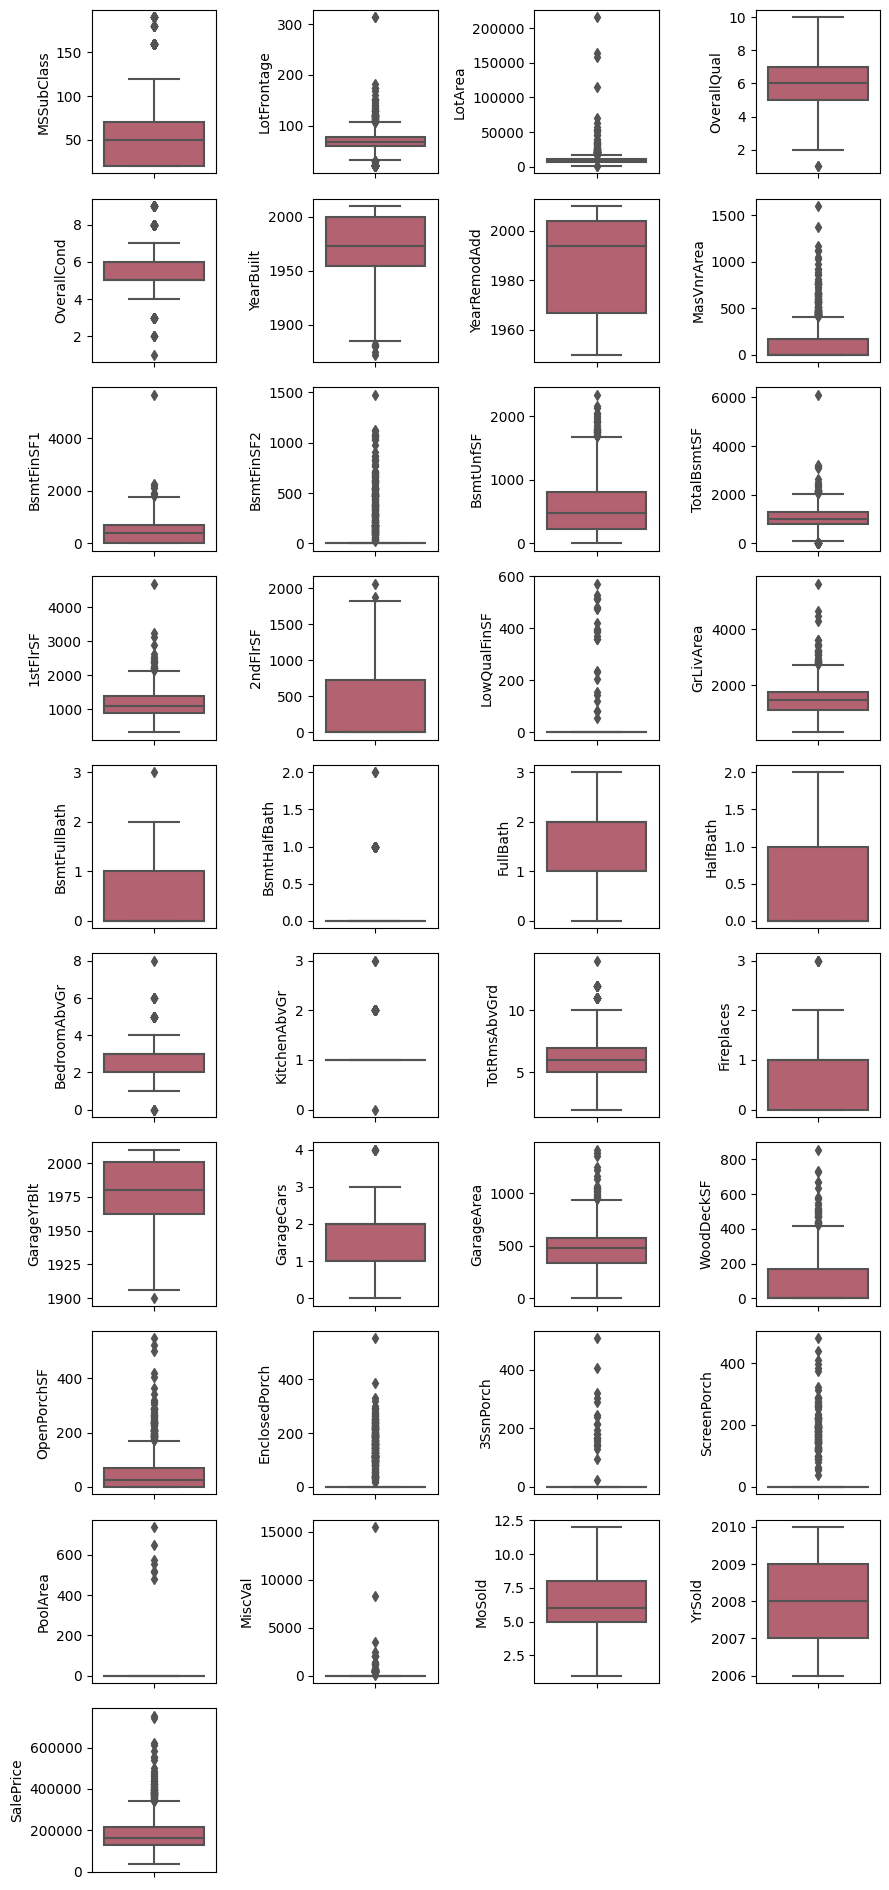

In [ ]:
#Boxplot Univariate Analysis (Numeric)
plt.figure(figsize=(9,19))
for i in range(0, len(data_num)):
    plt.subplot(10, 4, i+1)
    sns.boxplot(y=dataset[data_num[i]], color='#BF5569', orient='v')
    plt.tight_layout()

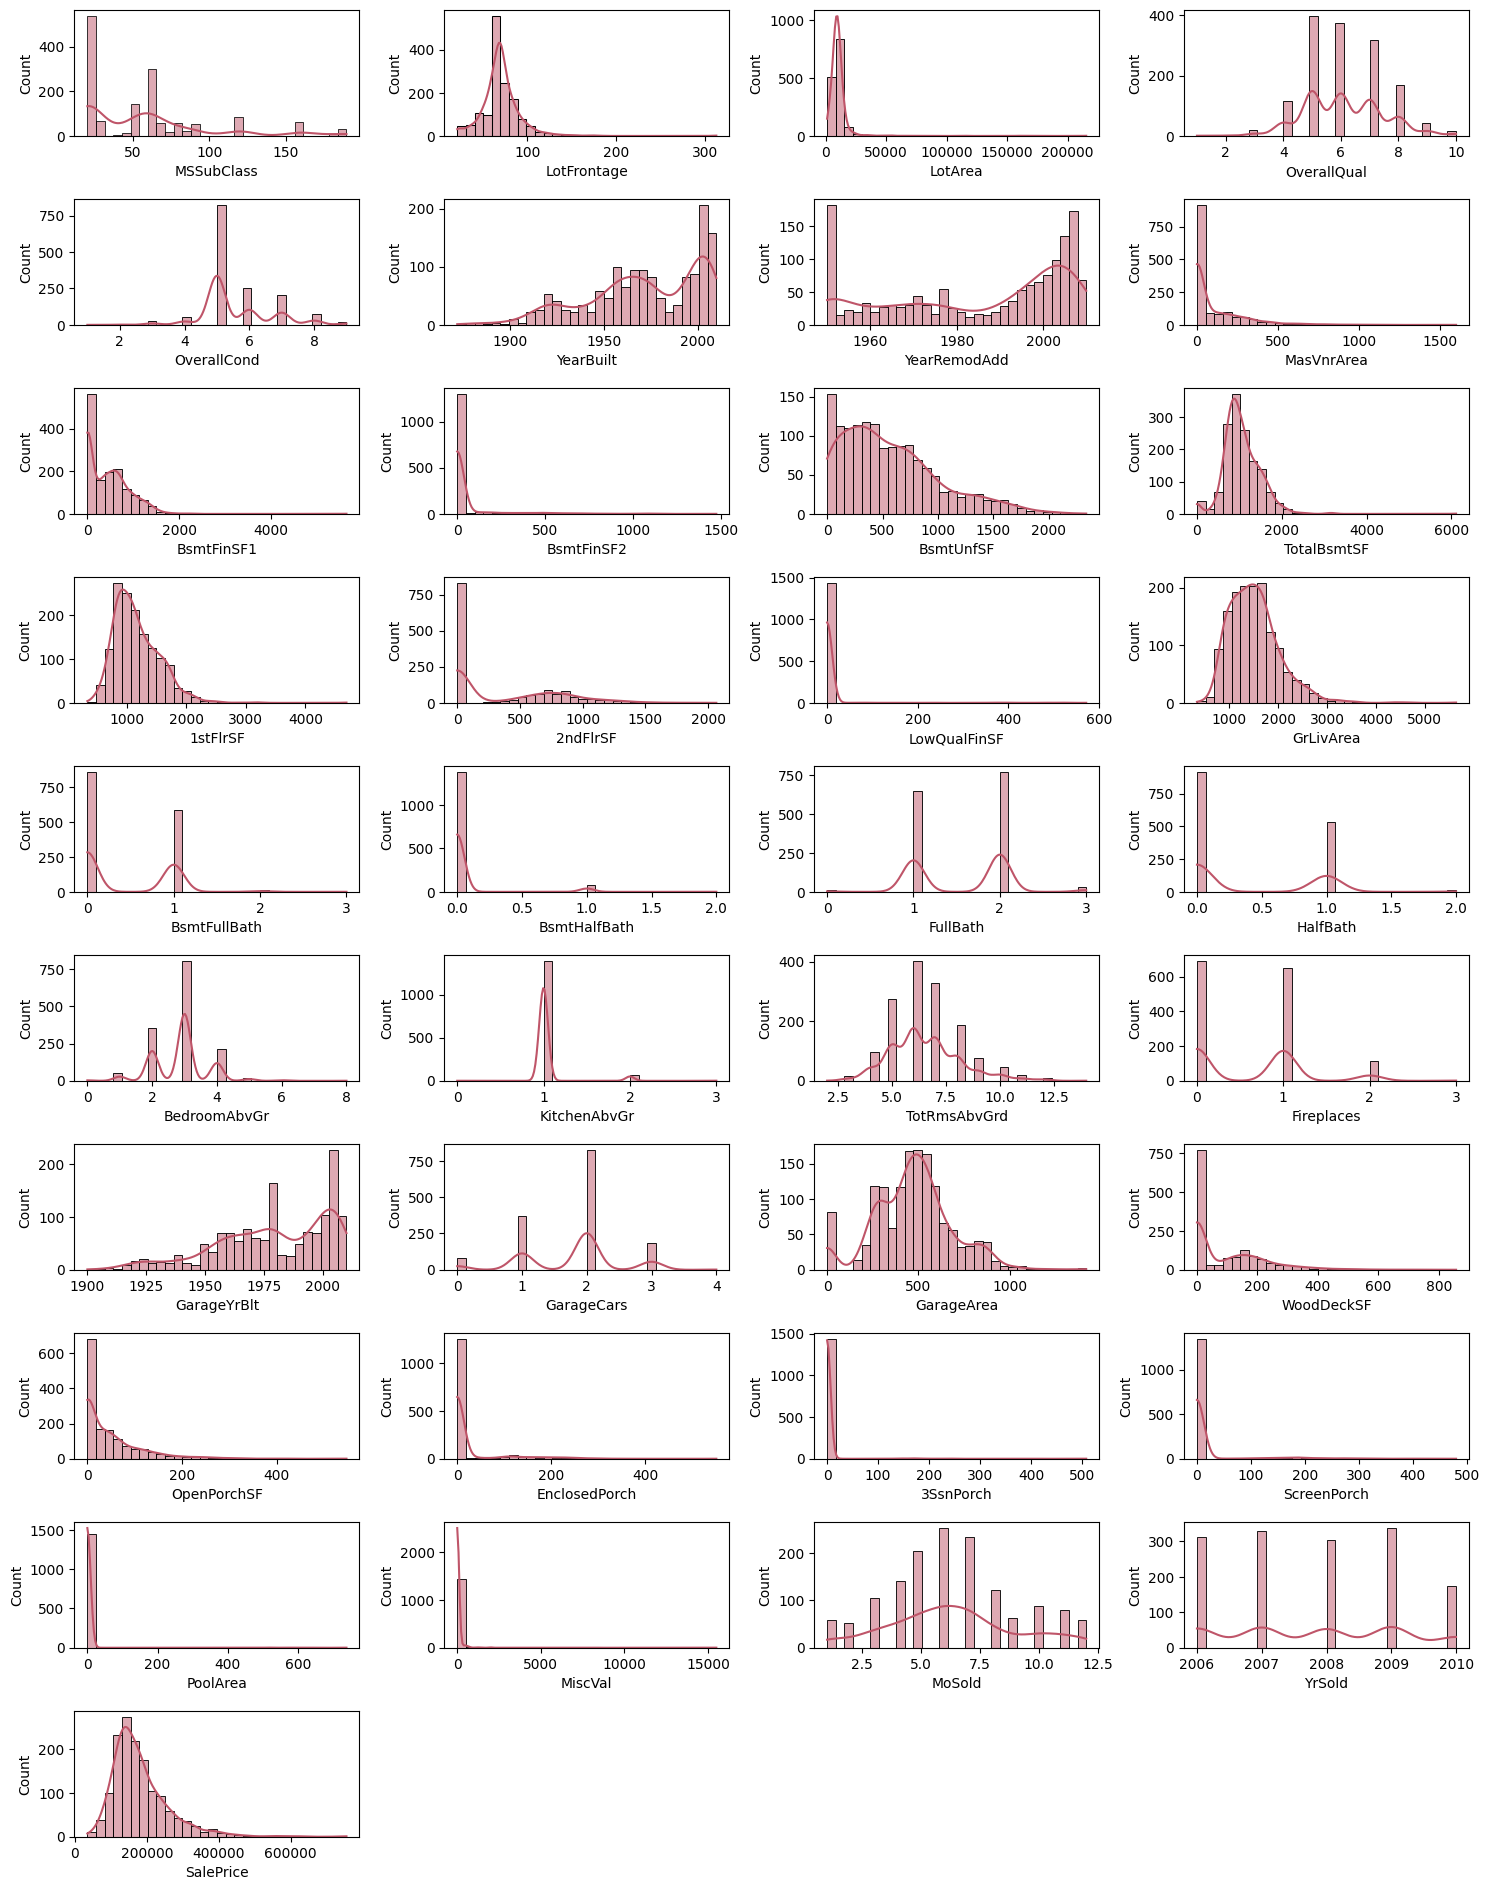

In [ ]:
#Histplot Univariate Analysis (Numeric)
plt.figure(figsize=(15, 19))
for i in range(0, len(data_num)):
    plt.subplot(10, 4, i+1)
    sns.histplot(dataset[data_num[i]], color='#BF5569', kde=True, bins = 30)
    plt.tight_layout()

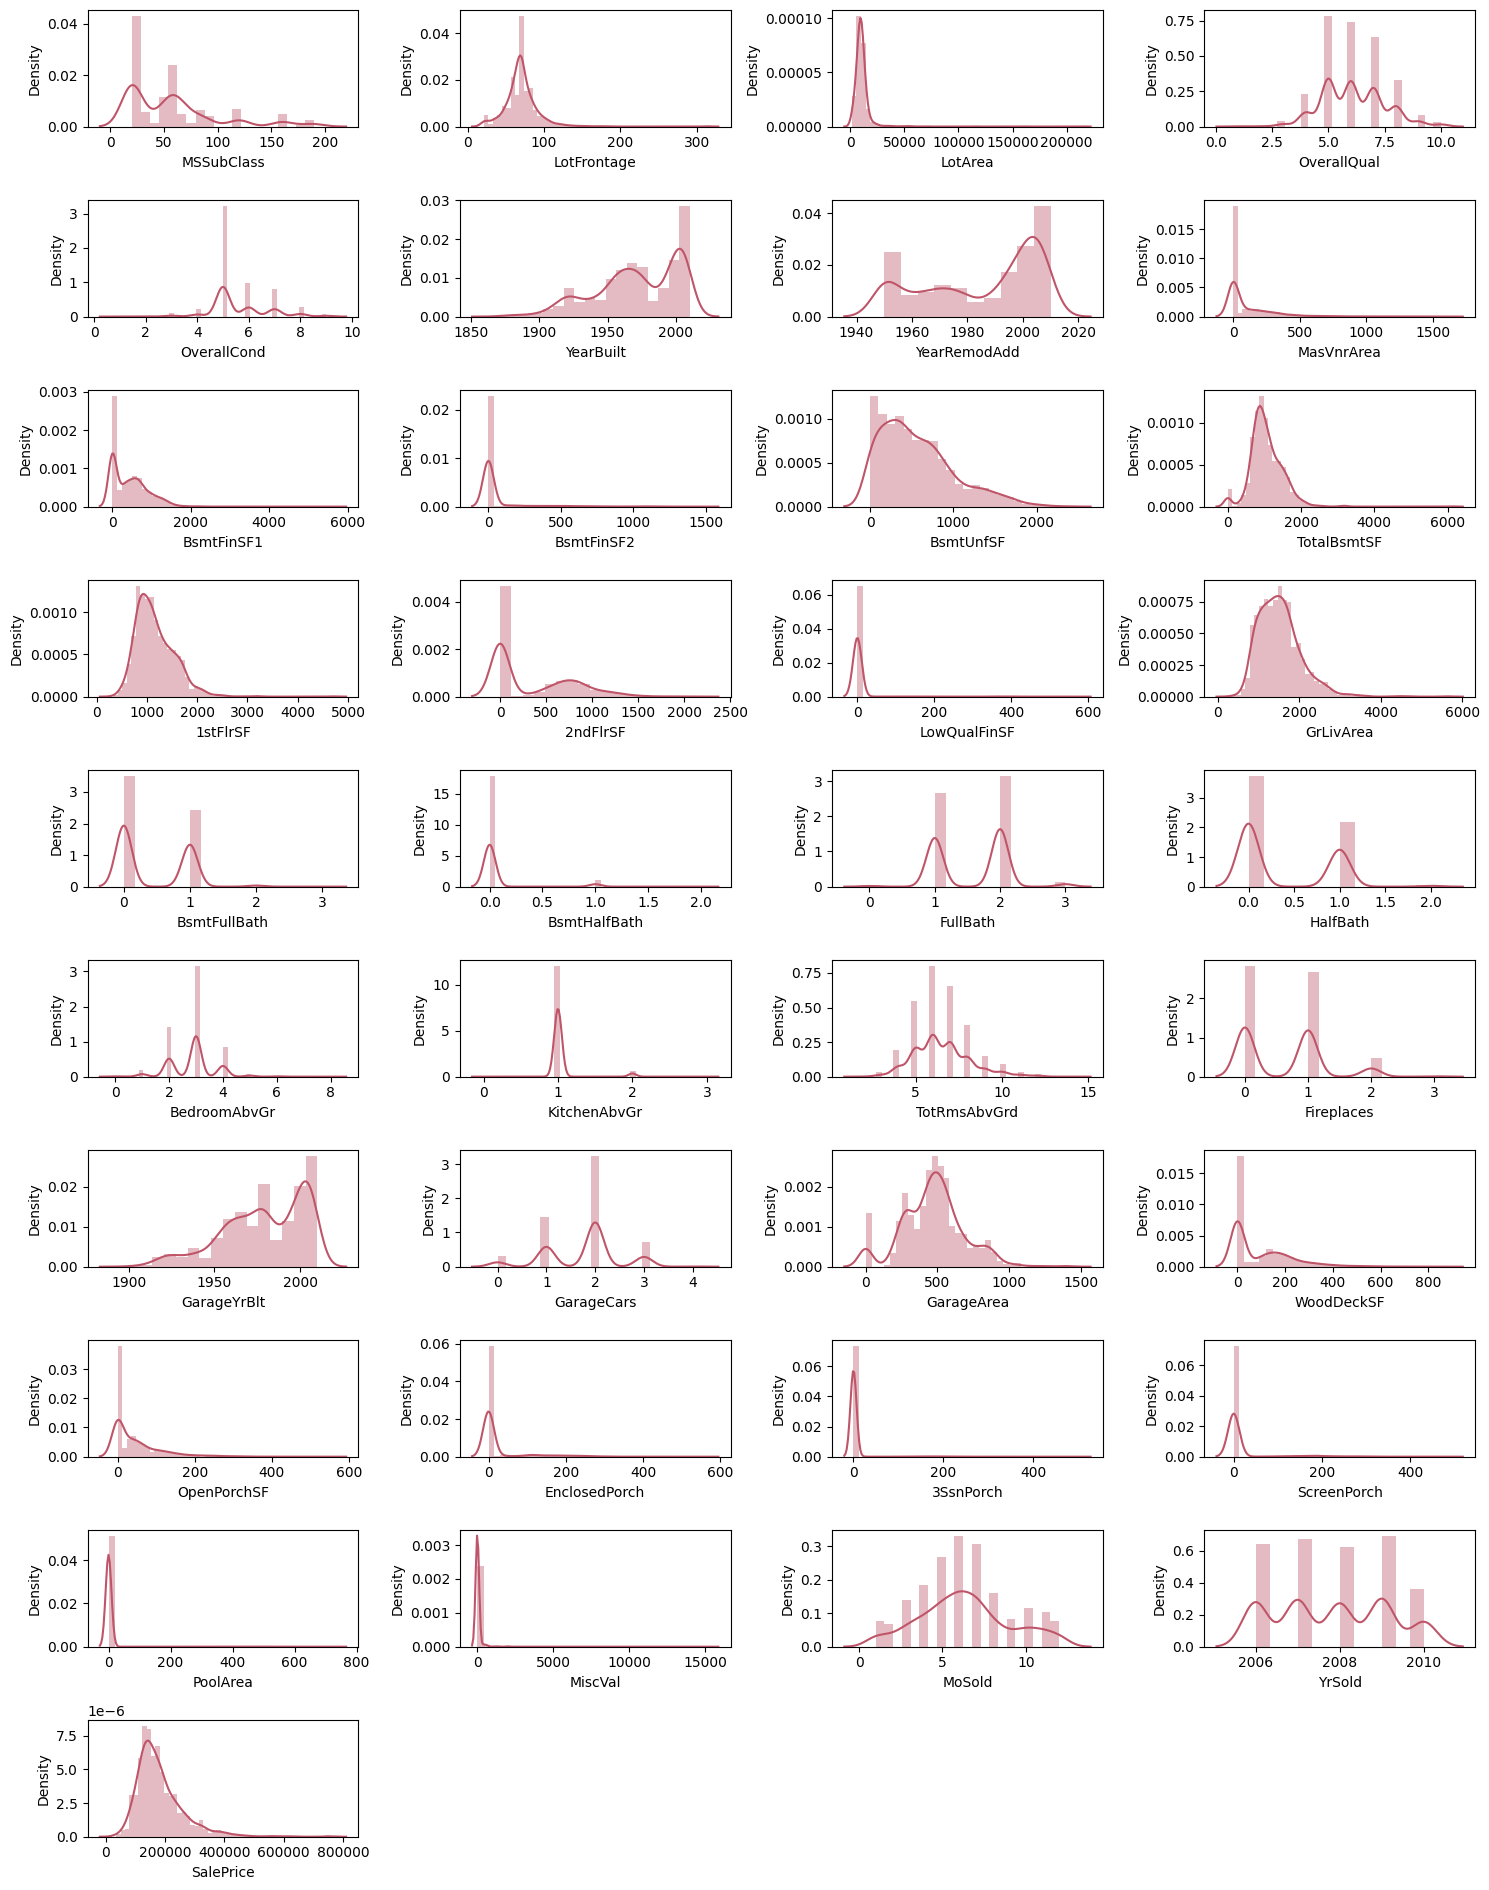

In [ ]:
#distplot Univariate Analysis (Numeric)
plt.figure(figsize=(15, 19))
for i in range(0, len(data_num)):
    plt.subplot(10, 4, i+1)
    sns.distplot(dataset[data_num[i]], color='#BF5569')
    plt.tight_layout()

<Axes: >

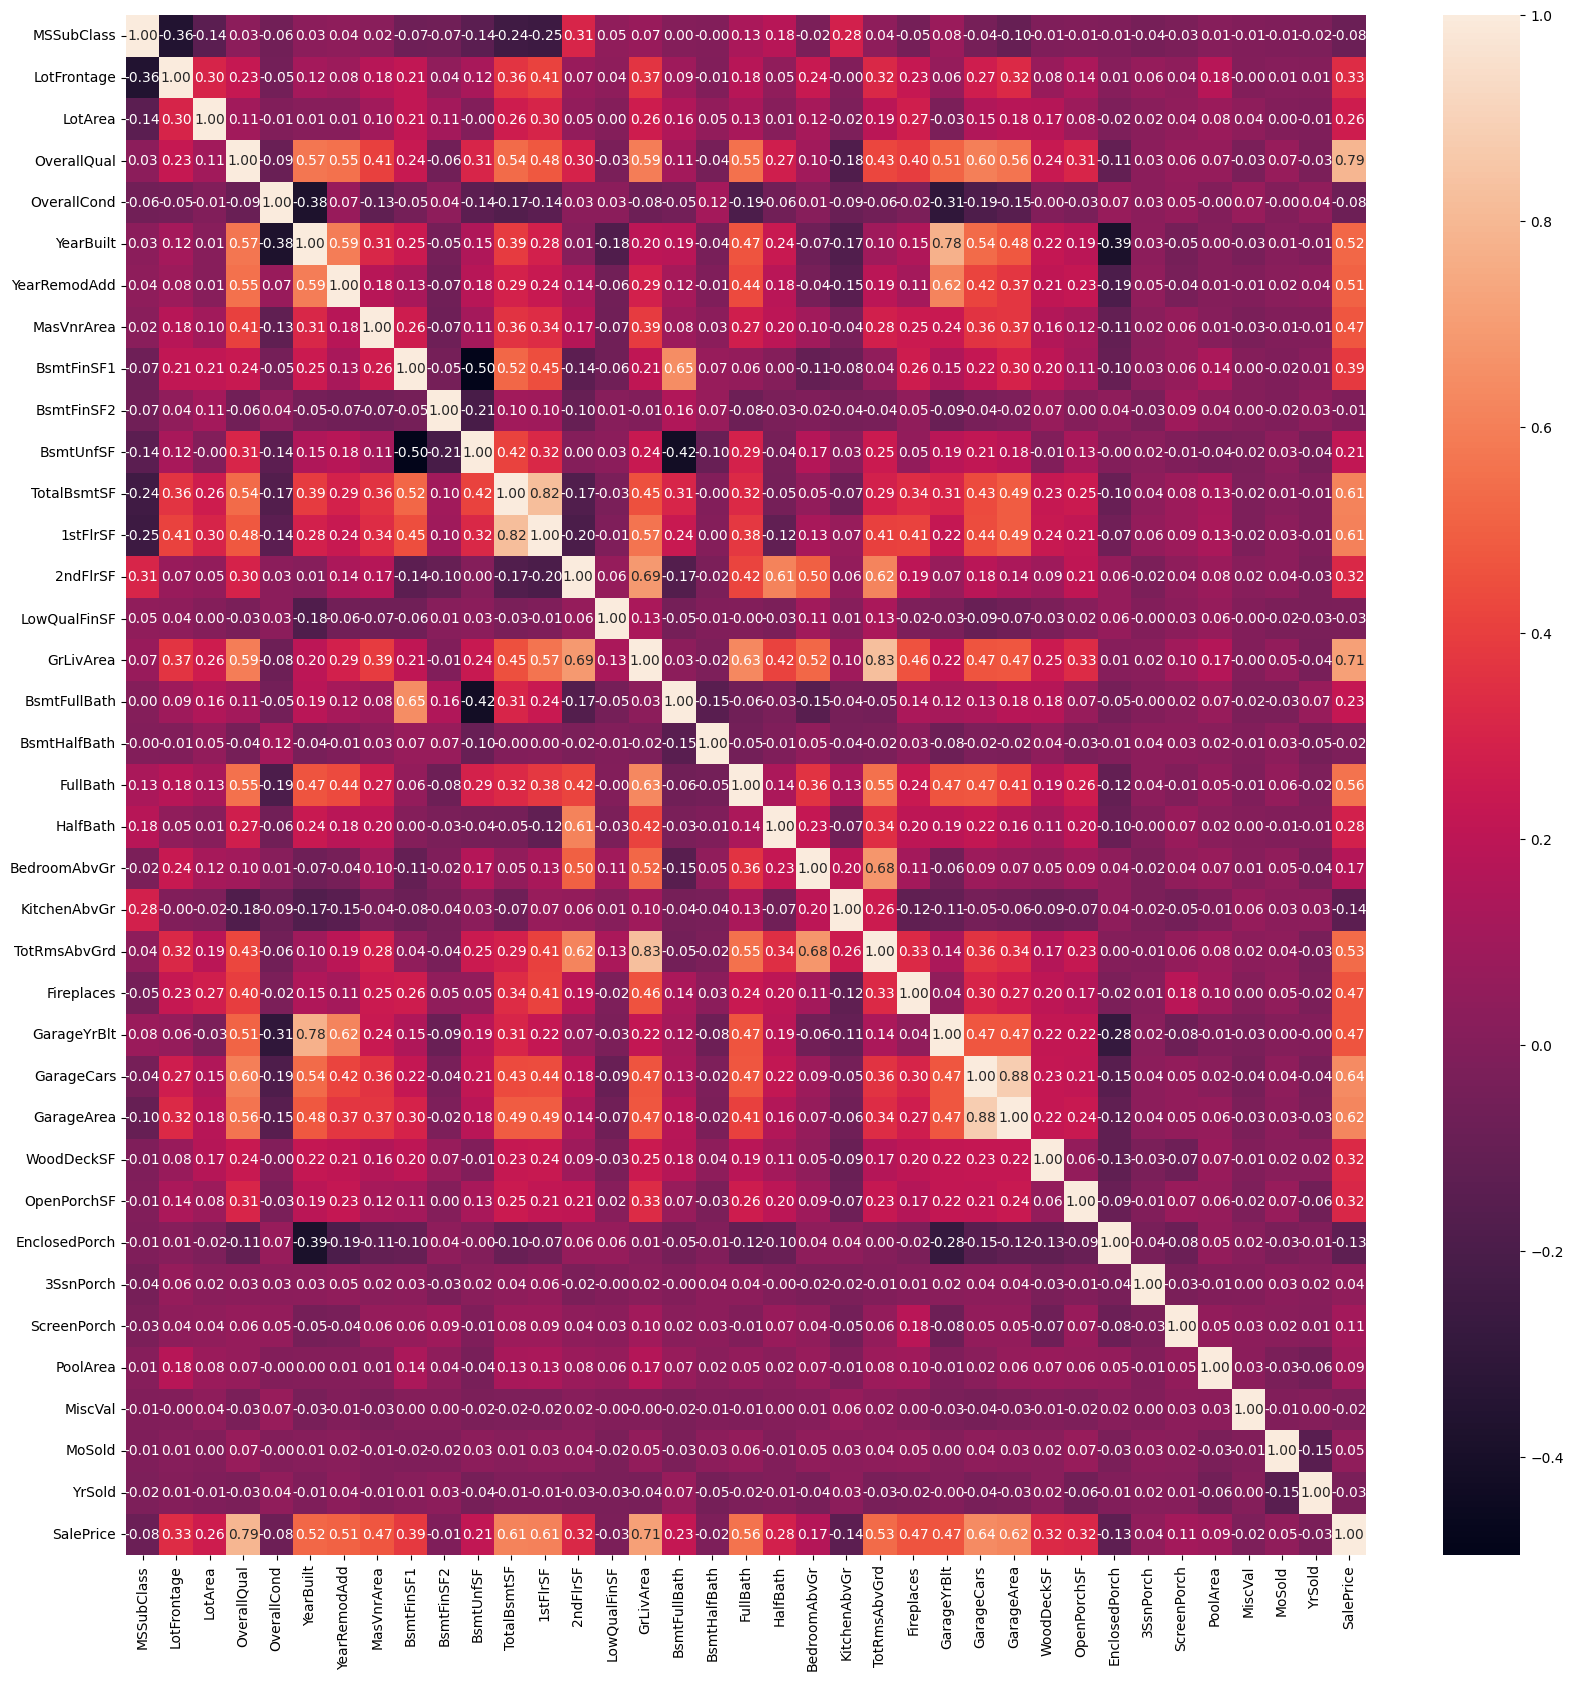

In [ ]:
#Membuat heatmap dengan seaborn
plt.figure(figsize = (20, 20))
sns.heatmap(dataset[data_num].corr(), annot=True, fmt='.2f')

Berdasarkan output heatmap, diketahui SalePrice berkorelasi lumayan besar dengan OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, dan feature lain yang > 0,5. Sedangkan berkorelasi rendah dengan MSSubClass, OverallCond, BsmtFinSF2, dan feature lainnya yang < 0,5.

## **1.7 Multiple Linear Regression**

In [ ]:
#Mengambil variabel berkorelasi tinggi
corr=dataset.corr()

high_corr_features=corr.index[abs(corr['SalePrice'])>0.50]
print(f'highly correlated feature:\n',high_corr_features)
print(f'No. of highly correlated features:',len(high_corr_features))

highly correlated feature:
 Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')
No. of highly correlated features: 11


Pada tahap ini, diambil variabel-variabel yang berkorelasi tinggi (di atas 0.50) dengan `SalePrice`. Hasilnya berikut adalah variabel yang memiliki korelasi tinggi: `OverallQual`, `YearBuilt`, `YearRemodAdd`, `TotalBsmtSF`, `1stFlrSF`, `GrLivArea`, `FullBath`, `TotRmsAbvGrd`, `GarageCars`, dan `GarageArea`.

Pada data untuk variabel independen (X), `SalePrice` dihapus karena variabel tersebut akan digunakan sebagai variabel dependent (Y)

In [ ]:
X=dataset[high_corr_features.drop('SalePrice')]
Y=dataset[['SalePrice']]

In [ ]:
#Membagi data training dan testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Dataset dibagi menjadi data train dan data test dengan pembagian sebagai berikut:

30% = data test

70% = data train

Sebelum digunakan, dilakukan scaling/standarisasi pada data variabel independen (X) baik pada data train maupun data test sebagai berikut

In [ ]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


Membuat model Linear Regression

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression()

Menentukan nilai intercept

In [ ]:
print('Intercept: \n', linreg.intercept_)

Intercept: 
 [181312.6927593]


Menentukan nilai koefisien untuk masing-masing variabel independen

In [ ]:
print('Coefficients: \n', linreg.coef_)

Coefficients: 
 [[27011.6212233   8885.34390906  6313.49759951  5392.31507287
   5958.70000515 24633.05721566 -3791.56190749   968.19296667
  10358.33353693  1566.98975396]]


Karena sudah diketahui intercept dan koefisiennya, dapat dibuat model regresi menjadi:

**y = 181312.6927593 + 27011.6212233 X + 8885.34390906 X2 + 6313.49759951 X3 + 5392.31507287 X4 + 5958.70000515 X5 + 24633.05721566 X6 - 3791.56190749 X7 + 968.19296667 X9 + 10358.33353693 X10 + 1566.98975396 X11**

Dengan variabel X adalah variabel independen yang berkorelasi tinggi dengan SalePrice yaitu `OverallQual`, `YearBuilt`, `YearRemodAdd`, `TotalBsmtSF`, `1stFlrSF`, `GrLivArea`, `FullBath`, `TotRmsAbvGrd`, `GarageCars`, dan `GarageArea`.

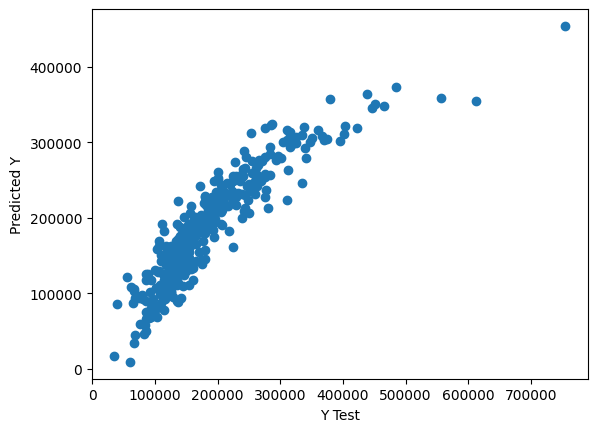

In [ ]:
#Plot Regresi
pred = linreg.predict(X_test)
plt.scatter(Y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Hasil prediksi SalePrice berdasarkan model yang terbentuk

In [ ]:
print(pred)

[[154577.90969096]
 [298358.09465333]
 [117986.63775491]
 [168454.89168341]
 [293999.16361105]
 [ 58969.56057908]
 [223326.37195315]
 [172502.56962167]
 [ 57735.39373471]
 [128970.6672624 ]
 [153701.49236177]
 [110740.77000798]
 [ 92020.92544267]
 [231423.68326551]
 [199870.94000076]
 [128575.99987538]
 [220036.20801696]
 [137669.45392472]
 [121068.23616107]
 [226581.16477575]
 [189793.56261429]
 [234691.64819345]
 [187472.94994467]
 [121381.76460484]
 [220910.35971914]
 [178643.59386117]
 [216978.86953144]
 [ 93821.6646003 ]
 [193912.14175308]
 [217479.13103266]
 [129172.44826601]
 [256913.76418297]
 [215627.96993352]
 [ 89629.96391777]
 [275815.73744869]
 [149009.53066049]
 [168613.29648798]
 [230514.37582752]
 [302984.15643414]
 [ 92229.81154836]
 [142423.77215332]
 [243300.13228867]
 [118505.06769114]
 [312370.47703297]
 [130508.64969022]
 [162829.09788029]
 [111321.31327511]
 [117140.87782208]
 [351016.42791923]
 [137420.79480155]
 [107592.66019956]
 [198324.34723426]
 [124335.899

## **1.8 Evaluation**

In [ ]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('MAPE:', mean_absolute_percentage_error(Y_test, pred))

MAE: 24606.103629866564
MSE: 1361140112.2495568
RMSE: 36893.632407904166
MAPE: 0.14749473322041343


MAPE adalah persentase kesalahan rata-rata secara mutlak. Diperoleh nilai MAPE sebesar 0.14749 yang dapat dikategorikan bahwa model dikatakan baik.


Semakin kecil keempat nilai tersebut, maka semakin baik model yang dibentuk.

# **2. MODEL CLUSTERING**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Untuk uploading file
from google.colab import files

> ## **2.1 Data Collection**

In [ ]:
# Read dataset
df = pd.read_csv("Mall_Customers.csv")

> ## **2.2 Analisis data eksploratif (EDA) antar variabel**

>> ### 2.2.1 Data Understanding

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(index=str, columns={'Annual Income (k$)': 'Annual Income',
                              'Spending Score (1-100)': 'Spending Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Dilakukan perubahan nama kolom pada Annual Income (k$) menjadi Annual Income dan Spending Score (1-100) menjadi Spending Score untuk memudahkan ketika memanggil nama kolom.




In [ ]:
# Mengetahui dimensi dataset (jumlah rows dan column)
df.shape

(200, 5)

Melalui `df.shape` kita dapat mengetahui bahwa pada mall_customer.csv terdapat 200 baris dan 5 kolom.

In [ ]:
#show columns (Mengetahui variabel/ column yang terdapat dalam dataset)
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

Melalui df.columns kita dapat mengetahui bahwa pada mall_customer.csv terdapat 5 kolom, yaitu CustomerID, Gender, Age, Income, dan Score

>> ### 2.2.2 Data Pre-Processing

In [ ]:
#show data info and check for null value
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


* Dataset ini memiliki variabel-variabel yang diperoleh dari kartu membership. Isinya berupa informasi dasar mengenai kostumer seperti Customer ID, gender, age, annual income, dan spending score. Spending Score diperoleh dari perilaku kostumer dan  data pembelian.
* Dengan total baris sebanyak 200, tidak terdapat kolom yang memiliki nilai null, hal ini dapat dilihat dari Non-Null Count.
* Selanjutnya, lihat apakah tipe data sudah sesuai. Dalam hal ini, seluruh tipe data sudah sesuai sehingga tidak perlu ada yang diubah lagi. Dimana kolom dengan tipe integer sebanyak 4 kolom dan 1 kolom bertipe object.

In [ ]:
#Missing Values Checking
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

Untuk memastikan apakah terdapat missing values, gunakan `(name of dataframe).isnull().sum()` dan terlihat bahwa tidak terdapat missing values sama sekali.

In [ ]:
#Duplicated Values Checking
df.duplicated().sum()

0

Untuk melihat apalah terdapat data duplikat pada dataset dapat menggunakan `df.duplicated().sum()` dan terlihat bahwa dalam dataset tidak terdapat data yang duplikat.

In [ ]:
#Drop Columns CustomerID
df=df.drop('CustomerID', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual Income   200 non-null    int64 
 3   Spending Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


Karena pada analisis ini Customer ID tidak diperlukan, maka bisa kita hapus dengan df.drop lalu axis 1 karena kita ingin menghapus kolomnya.

In [ ]:
# Categorical Data
cats=[i for i in df.columns if df[i].dtypes == 'object']
# Numerical Data
nums=[i for i in df.columns if df[i].dtypes != 'object']

#print variabel/column dari categorical variabel
print('Variabel kategorik :')
print(cats)

#print variabel/column dari numerical variabel
print('Variabel Numerik :')
print(nums)

Variabel kategorik :
['Gender']
Variabel Numerik :
['Age', 'Annual Income', 'Spending Score']


Membagi antara kolom-kolom yang berupa kategorik dan numerik. Penyimpanan kolom ini memudahkan untuk proses kedepannya dimana kita fokus pada kolom-kolom yang akan dilakukan analisis.

In [ ]:
#Looking for nums variables
df[nums].head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
# Value count for categorical variable
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Gender:
Female    112
Male       88
Name: Gender, dtype: int64



Variabel kategorik pada dataset ini hanya terdiri dari kolom Gender dengan total kostumer perempuan sebanyak 112 dan kostumer laki-laki sebanyak 88

>> ### 2.1.3 Statistical Summary

In [ ]:
#Numeric
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


* Melalui nilai mean dan median, dapat dideteksi skewed distributionnya. Pada Age, mean > median maka memiliki positively skewed distribution. Pada Annual Income (k$), mean < median maka memiliki negatively skewed distribution. Terakhir, pada Spending Score (1-100), karena mean dan median tidak memiliki perbedaan yang jauh maka memiliki normal distribution.

In [ ]:
#categorical
df[cats].describe().T

,count,unique,top,freq
Gender,200,2,Female,112


Terlihat bahwa dalam variabel categorical hanya terdapat kolom Gender yang memiliki 2 label dengan mayoritas labelnya adalah famale dengan frekuensi sebanyak 112.

>> **Univariat Analysis**

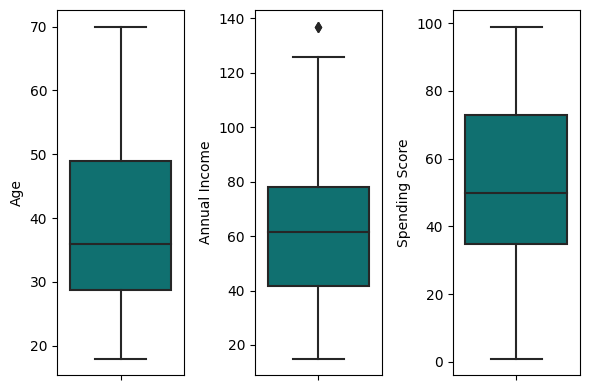

In [ ]:
#Boxplot of age, annual income, and spending score
plt.figure(figsize=(6,4))
for i in range(0, len(nums)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[nums[i]], color='teal', orient='v')
    plt.tight_layout()

* Berdasarkan output boxplot, Age dan Spending Score (1-100) tidak memiliki outlier sedangkan Annual Income (k$) hanya memiliki satu outlier.

* Pada kolom Age, dapat diketahui bahwa umur customer mall tersebut secara umum berada pada rentang usia sekitar 28 tahun sampai 49 tahun.
* Pada kolom Annual Income, dapat diketahui bahwa pendapatan customer mall secara umum sekitar 41k USD sampai 78k USD.
* Pada kolom Spending Score (1-100), dapat diketahui bahwa nilai yang diberikan oleh pihak mall kemapada customer mall berdasarkan perilaku customer secara umum sekitar 34 sampai 73.

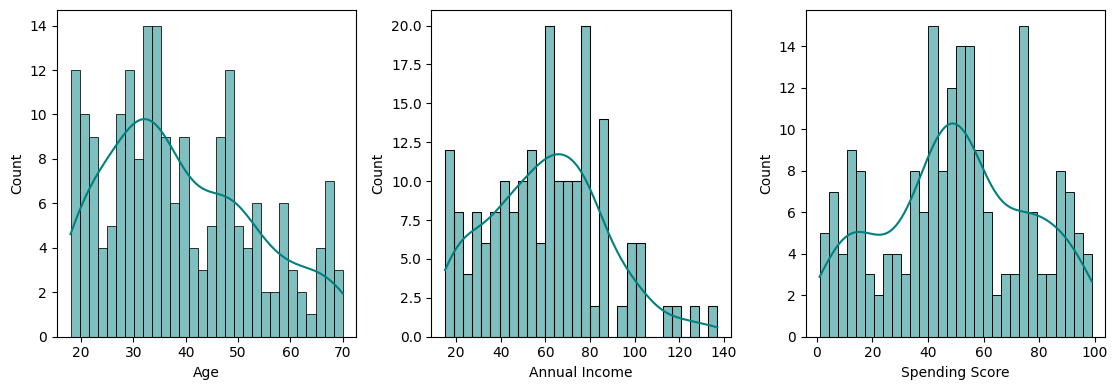

In [ ]:
#Histplot
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.histplot(df[nums[i]], color='teal', kde=True, bins = 30)
    plt.tight_layout()

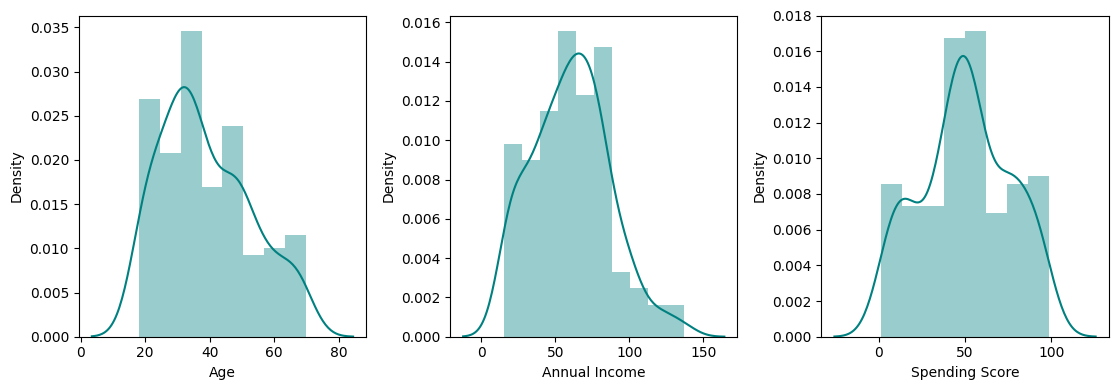

In [ ]:
#distplot
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.distplot(df[nums[i]], color='teal')
    plt.tight_layout()

Melalui output histogram dan distplot, dapat diketahui frekuensi tiap-tiap nilai dan dapat disimpulkan juga bahwa:
* Age memiliki positively skewed distribution karena secara visual ekor kan pada kurva cenderung melebar ke kanan.
* Annual Income memiliki negatively skewed distribution karena secara visual ekor kan pada kurva cenderung melebar ke kiri.
* Spending Score secara visual menyerupai normal distribution.

<Axes: xlabel='Gender', ylabel='count'>

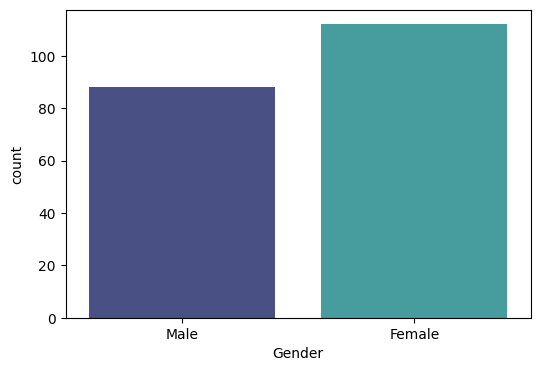

In [ ]:
#Count Plot Univariate Analysis (Categorical)
plt.figure(figsize=(6,4))
sns.countplot(data=df,x="Gender", palette='mako')

Setelah divisualisasi menggunakan count plot, terlihat bahwa kostumer mall mayoritas perempuan dengan jumlah sebanyak 112 sementara laki-laki sebanyak 88.

>> **Bivariat Analysis**

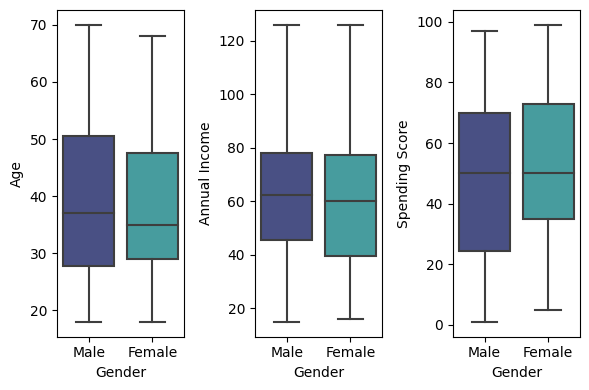

In [ ]:
#boxplot bivariate analysis
plt.figure(figsize = (6,4))
for i in range(0, len(nums)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y = df[nums[i]], x = df['Gender'], orient = 'v', showfliers = False, palette='mako') #Karena ingin fokus pada perbandingan, outliers tidak ditampilkan melalui showfliers=False
    plt.tight_layout()

* Pada kolom Age, dapat diketahui bahwa customer laki-laki memiliki persebaran umur yang lebih besar dibandingkan customer perempuan.
* Pada kolom Annual Income, dapat diketahui bahwa customer perempuan memiliki persebaran pendapatan yang lebih luas dibandingkan customer laki-laki.
* Pada kolom Spending Score, dapat diketahui bahwa customer laki-laki memiliki persebaran spending score yang lebih luas dibandingkan customer perempuan.

<Axes: >

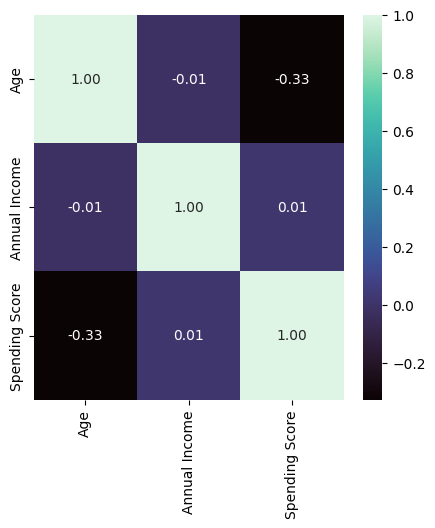

In [ ]:
# Correlation Heatmap untuk variabel numerik
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='mako')

Melalui heatmap, dapat dilihat apakah terdapat korelasi antar feature. Dalam hal ini, kolom Age dan Speanding Score berkorelasi negatif sebesar -0.33, kemudian kolom age dan Annual Income berkorelasi negatof sebesar -0.01, serta kolom Annual Income dan Spending Score berkorelasi positif sebanyak 0.01.

>> **Multivariat Analysis**

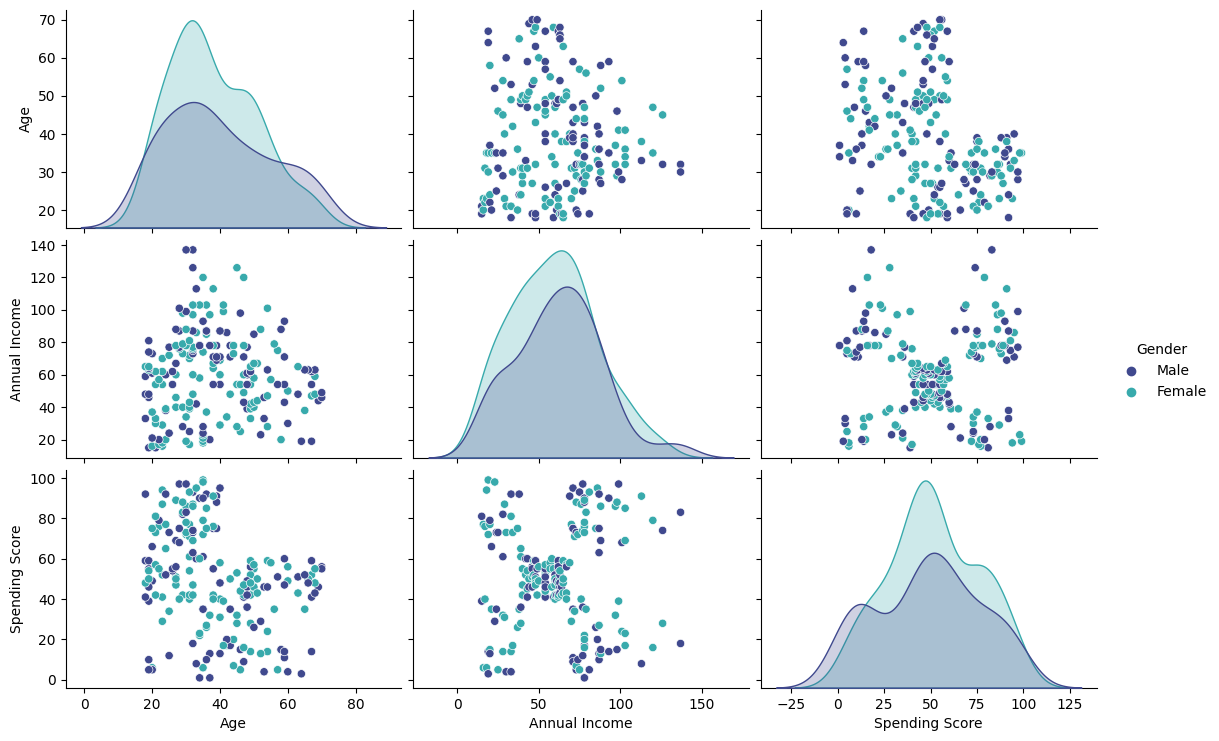

In [ ]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(df, hue='Gender', aspect=1.5, palette='mako')
plt.show()

Berdasarkan plot di atas, dapat diketahui bahwa:
- Antara feature Age dan Annual Income secara visual terlihat bahwa data menyebar secara acak dan tidak terlihat membentuk cluster.
- Antara feature Age dan Spending Score secara visual terlihat membentuk suatu pola tertentu.
- Antara feature Annual Income dan Speanding Score terlihat membentuk beberapa cluster.
- Berdasarkan plot terlihat pula bahwa gander tidak memiiki hubungan terhadap segmantasi customer.

## **2.3 K-MEANS CLUSTERING**

>> ### 2.3**.1** Spending Score and Annual Income

>> **MODEL**

In [ ]:
# Filtering the annual income and spending score from the dataset
data = df[['Annual Income', 'Spending Score']].iloc[:, :].values

Membuat dataset baru yang hanya terdiri dari Spending Score dan Annual Income untuk melakukan analisis k means clustering pada kolom tersebut.

In [ ]:
#Taking 5 clusters
km1=KMeans(n_clusters=5, random_state=0)
#Fitting the input data
km1.fit(data)
#predicting the labels of the input data
y=km1.predict(data)
#adding the labels to a column named label
df["cluster_Spending-Income"] = y
#The new dataframe with the clustering done
df.head()

,Gender,Age,Annual Income,Spending Score,cluster_Spending-Income
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


Pada KMeans diambil n clusters = 5 dikarenakan secara visual terlihat bahwa terbentuk 5 cluster.

Berdasarkan hasil prediksi terlihat bahwa :
- data pada customer pertama dengan spending score sebesar 39 dan Annual Income sebesar 15 termasuk ke dalam cluster 4.
- data pada customer kedua dengan spending score sebesar 81 dan Annual Income sebesar 15 termasuk ke dalam cluster 3.
- data pada customer ketiga dengan spending score sebesar 6 dan Annual Income sebesar 16 termasuk ke dalam cluster 4.
- data pada customer keempat dengan spending score sebesar 77 dan Annual Income sebesar 16 termasuk ke dalam cluster 3.
- data pada customer kedua dengan spending score sebesar 40 dan Annual Income sebesar 17 termasuk ke dalam cluster 4.

dst..

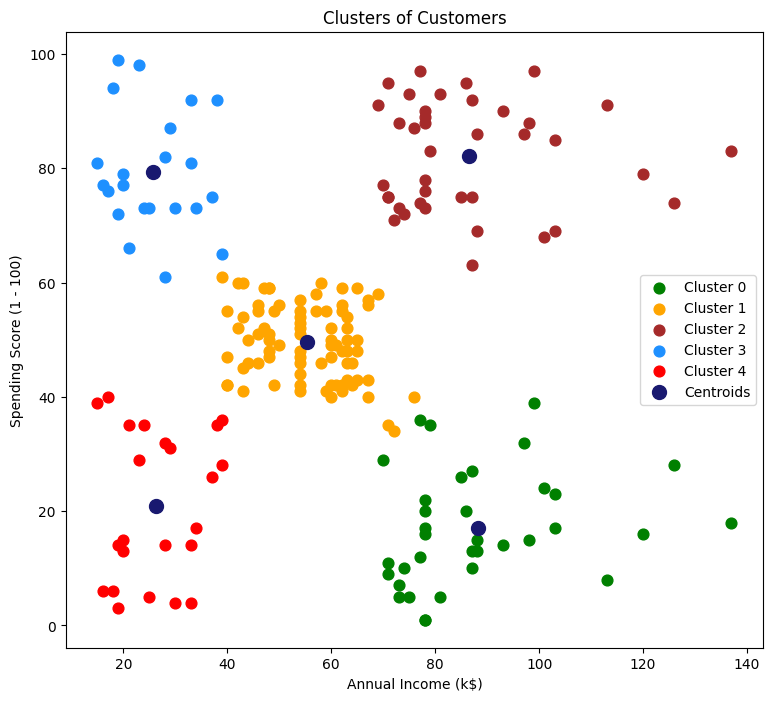

In [ ]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(data)

# Visualizing the clusters
plt.figure(figsize = (9, 8))
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 60, c = 'green', label = 'Cluster 0')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 60, c = 'orange', label = 'Cluster 1')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s = 60, c = 'brown', label = 'Cluster 2')
plt.scatter(data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s = 60, c ='dodgerblue', label = 'Cluster 3')
plt.scatter(data[y_kmeans == 4, 0], data[y_kmeans == 4, 1], s = 60, c = 'red', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'midnightblue', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

Berdasarkan scatterplot dari clustering, terlihat bahwa:
- Cluster 0 merupakan cluster dengan nilai spending score rendah dan nilai annual income tinggi.
- Cluster 1 merupakan cluster dengan nilai spending score sedang dan nilai annual income sedang.
- Cluster 2 merupakan cluster dengan nilai spending score timggi dan nilai annual income tinggi.
- Cluster 3 merupakan cluster dengan nilai spending score tinggi dan nilai annual income rendah.
- Cluster 4 merupakan cluster dengan nilai spending scaore rendah dan nilai annual income rendah.

>> **EVALUATION**

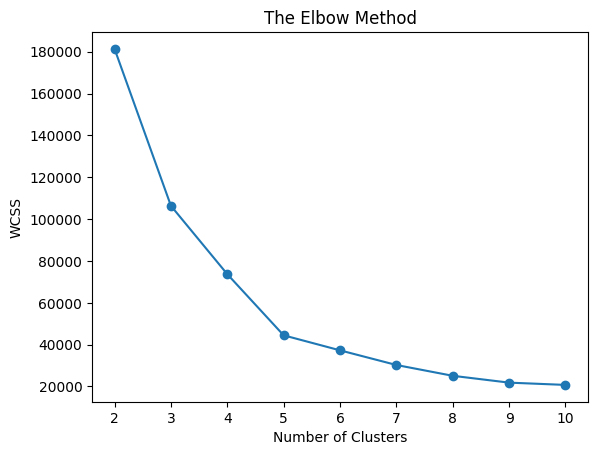

In [ ]:
# Using the elbow method to find the optimal number of clusters
inertia=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_) #inertia_ = to find the wcss value

plt.plot(range(2,11),inertia, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Untuk memmastikan bahwa cluster yang ditentukan sebelumnya sudah tepat maka dapat dipastikan salah satunya adalah dengan menggunakan Elbow Method. Dimana pada output elbow method terlihat bahwa:

Pada grafik dengan patahan, interpretasi elbow dapat dilakukan terhadap kedua segmen kurva, yaitu segmen sebelum dan sesudah patahan.

Pada segmen sebelum patahan, variabilitas data yang dijelaskan oleh klaster-klaster tersebut menurun secara signifikan dengan penambahan jumlah klaster.

Pada segmen sesudah patahan, penurunan variabilitas data yang dijelaskan oleh klaster-klaster tersebut tidak sebesar pada segmen sebelumnya, bahkan mungkin tidak signifikan atau cenderung datar.

Sehingga, jumlah klaster yang optimal dapat ditentukan berdasarkan titik patahan tersebut yaitu 5 cluster


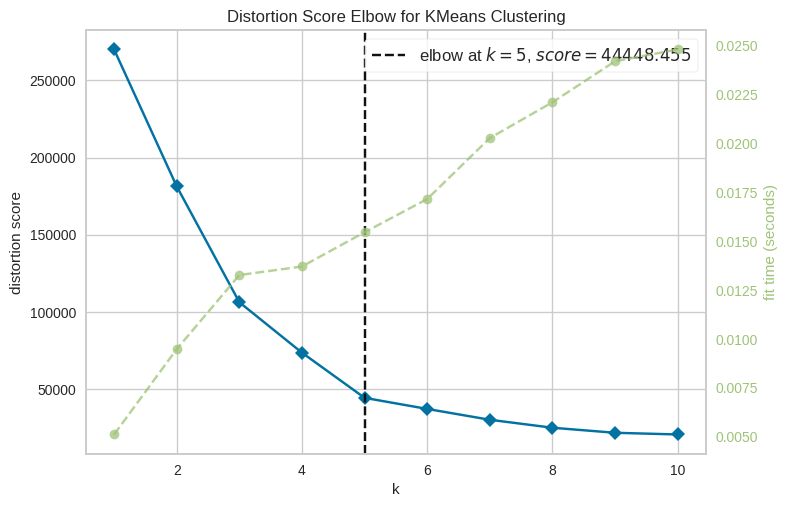

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_clusters=i, init='k-means++',random_state=0)
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(data)
visualizer.show()
plt.show()

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4607224274992025
For n_clusters=10, the silhouette score is 0.449795408266166


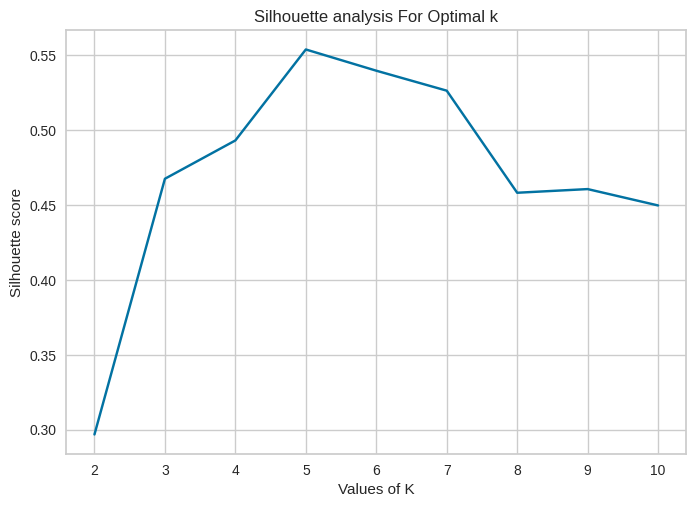

In [ ]:
# Silhouette Analysis
sil_avg = []
range_n_clusters = list(range(2,11))
for num_clusters in range_n_clusters:

    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    sil_avg.append(silhouette_score(data, cluster_labels, metric = 'euclidean'))

    # Silhouette Score
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

plt.plot(range_n_clusters,sil_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

Untuk memastikan lebih lanjut dapat menggunakan silhouette score. Dimana :

Dalam k-means clustering, silhouette score biasanya digunakan untuk mengevaluasi seberapa baik model dapat memisahkan kelompok data menjadi cluster yang berbeda dengan jumlah k yang berbeda. Nilai silhouette score dapat membantu dalam menentukan jumlah cluster yang optimal untuk model k-means. Semakin tinggi nilai silhouette score untuk suatu jumlah k, semakin baik model dapat memisahkan kelompok data menjadi cluster dengan jumlah k tersebut.

Berdasarkan output terlihat bahwa n_cluster=5 memiliki silhouette score yang paling tinggi, sehingga dapat disimpulkan bahwa segmentasi customer pada dasaset mall customer berdasarkan Annual Income terbentuk 5 kelompok.

>> ### 2.3.2 Spending Score and Age

>> **MODEL**

In [ ]:
# Filtering the annual income and spending score from the dataset
data2 = df[['Age', 'Spending Score']].iloc[:, :].values

Membuat dataset baru yang hanya terdiri dari Spending Score dan Age untuk melakukan analisis k means clustering pada kolom tersebut.

In [ ]:
#Taking 4 clusters
km2=KMeans(n_clusters=4, random_state=0)
#Fitting the input data
km2.fit(data2)
#predicting the labels of the input data
y_1=km2.predict(data2)
#adding the labels to a column named label
df["cluster_Spending-Age"] = y_1
#The new dataframe with the clustering done
df.head()

,Gender,Age,Annual Income,Spending Score,cluster_Spending-Income,cluster_Spending-Age
0,Male,19,15,39,4,2
1,Male,21,15,81,3,1
2,Female,20,16,6,4,0
3,Female,23,16,77,3,1
4,Female,31,17,40,4,2


Pada KMeans diambil n clusters = 4 dikarenakan secara visual terlihat bahwa terbentuk 5 cluster.

Berdasarkan hasil prediksi terlihat bahwa :
- data pada customer pertama dengan spending score sebesar 39 dan Age 19 termasuk ke dalam cluster 2.
- data pada customer kedua dengan spending score sebesar 81 dan Age sebesar 21 termasuk ke dalam cluster 1.
- data pada customer ketiga dengan spending score sebesar 6 dan Age 20 termasuk ke dalam cluster 0.
- data pada customer keempat dengan spending score sebesar 77 dan Age 23 termasuk ke dalam cluster 1.
- data pada customer kedua dengan spending score sebesar 40 dan Age 31 termasuk ke dalam cluster 2.

dst..

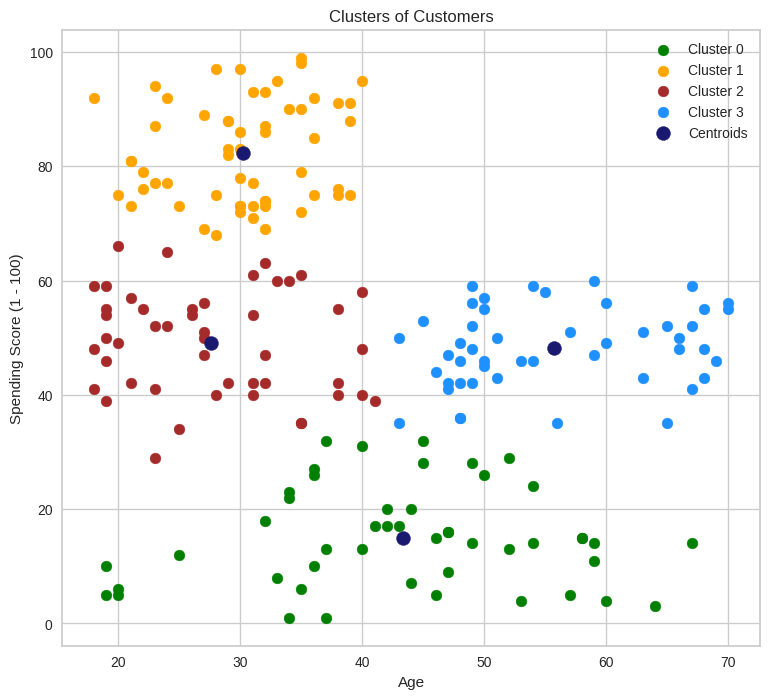

In [ ]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(data2)

# Visualizing the clusters
plt.figure(figsize = (9, 8))
plt.scatter(data2[y_kmeans == 0, 0], data2[y_kmeans == 0, 1], s = 60, c = 'green', label = 'Cluster 0')
plt.scatter(data2[y_kmeans == 1, 0], data2[y_kmeans == 1, 1], s = 60, c = 'orange', label = 'Cluster 1')
plt.scatter(data2[y_kmeans == 2, 0], data2[y_kmeans == 2, 1], s = 60, c = 'brown', label = 'Cluster 2')
plt.scatter(data2[y_kmeans == 3, 0], data2[y_kmeans == 3, 1], s = 60, c ='dodgerblue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'midnightblue', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

Berdasarkan scatterplot dari clustering, terlihat bahwa:
- Cluster 0 merupakan cluster dengan nilai spending score rendah.
- Cluster 1 merupakan cluster dengan nilai spending score tinggi dan age rendah.
- Cluster 2 merupakan cluster dengan nilai spending score sedang dan age rendah.
- Cluster 3 merupakan cluster dengan nilai spending score sedang dan age tinggi.

>> **EVALUATION**

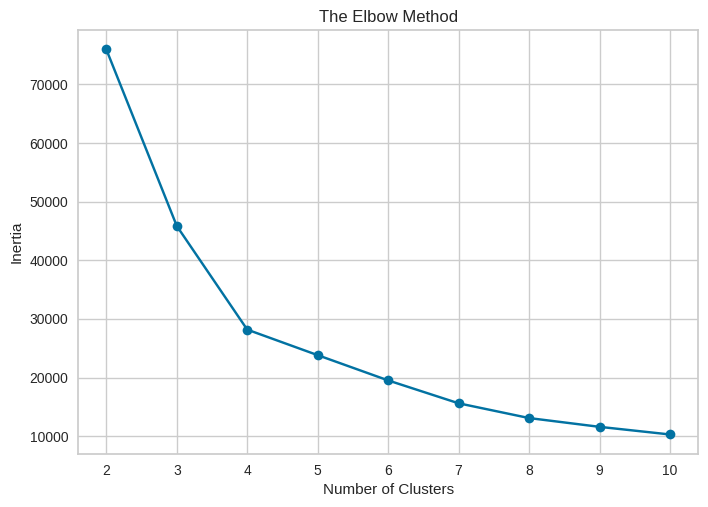

In [ ]:
# Using the elbow method to find the optimal number of clusters
inertia=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data2)
    inertia.append(kmeans.inertia_) #inertia_ = to find the wcss value

plt.plot(range(2,11),inertia, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Untuk memmastikan bahwa cluster yang ditentukan sebelumnya sudah tepat maka dapat dipastikan salah satunya adalah dengan menggunakan Elbow Method. Dimana pada output elbow method terlihat bahwa:

Pada grafik dengan patahan, interpretasi elbow dapat dilakukan terhadap kedua segmen kurva, yaitu segmen sebelum dan sesudah patahan.

Pada segmen sebelum patahan, variabilitas data yang dijelaskan oleh klaster-klaster tersebut menurun secara signifikan dengan penambahan jumlah klaster.

Pada segmen sesudah patahan, penurunan variabilitas data yang dijelaskan oleh klaster-klaster tersebut tidak sebesar pada segmen sebelumnya, bahkan mungkin tidak signifikan atau cenderung datar.

Sehingga, jumlah klaster yang optimal dapat ditentukan berdasarkan titik patahan tersebut yaitu 4 cluster

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.4460311217292306
For n_clusters=6, the silhouette score is 0.44092943301338033
For n_clusters=7, the silhouette score is 0.4212938931368575
For n_clusters=8, the silhouette score is 0.4294009050808998
For n_clusters=9, the silhouette score is 0.4193675464250694
For n_clusters=10, the silhouette score is 0.3932440056615681


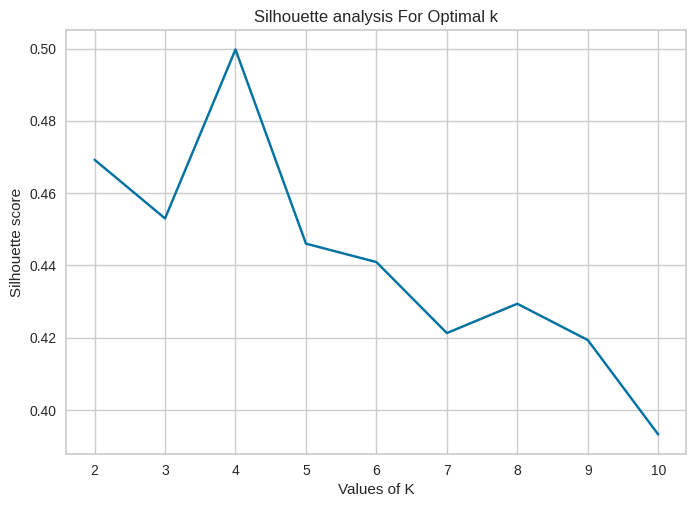

In [ ]:
# Silhouette Analysis
sil_avg = []
range_n_clusters = list(range(2,11))
for num_clusters in range_n_clusters:

    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data2)
    cluster_labels = kmeans.labels_
    sil_avg.append(silhouette_score(data2, cluster_labels, metric = 'euclidean'))

    # Silhouette Score
    silhouette_avg = silhouette_score(data2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

plt.plot(range_n_clusters,sil_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

Untuk memastikan lebih lanjut dapat menggunakan silhouette score. Dimana :

Dalam k-means clustering, silhouette score biasanya digunakan untuk mengevaluasi seberapa baik model dapat memisahkan kelompok data menjadi cluster yang berbeda dengan jumlah k yang berbeda. Nilai silhouette score dapat membantu dalam menentukan jumlah cluster yang optimal untuk model k-means. Semakin tinggi nilai silhouette score untuk suatu jumlah k, semakin baik model dapat memisahkan kelompok data menjadi cluster dengan jumlah k tersebut.

Berdasarkan output terlihat bahwa n_cluster=4 memiliki silhouette score yang paling tinggi, sehingga dapat disimpulkan bahwa segmentasi customer pada dasaset mall customer berdasarkan age terbentuk 4 kelompok.